Mahsa Pouramini / 9721973109 and Yasamin Rezayi / 9721973121

## Contents of notebook:
Libraries

Data preprocessing 

Kmeans alghorithm

## Libraries

In [191]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [192]:
df_train = pd.read_csv( "train.csv")
df_test = pd.read_csv( "test.csv")
df_test2 = pd.read_csv( "sample_submission.csv")


In [193]:
c_test  = df_test
c_train  = df_train
c_test 
c_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [194]:
c_train['train']  = 1
c_test['train']  = 0
df = pd.concat([c_train, c_test], axis=0,sort=False)

## Data preprocessing

In [195]:
#Percentage of NAN Values 
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [196]:
NAN = NAN[NAN.percentage > 50]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [197]:
#Drop PoolQC, MiscFeature, Alley and Fence features
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [198]:
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [199]:
object_columns_df.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [200]:
numerical_columns_df.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
train              int64
dtype: object

In [201]:
#Number of null values in each feature
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


In [202]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

c:\users\asman-r\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [135]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

In [136]:
#Number of null values in each feature
null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64


In [137]:
print((numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["LotFrontage"].median())

35.0
68.0


In [138]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)

<ipython-input-138-9e28cf644d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
<ipython-input-138-9e28cf644d27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)


In [139]:
numerical_columns_df= numerical_columns_df.fillna(0)

In [140]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
495,496,30,C (all),60.0,7879,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,11,2009,WD,Abnorml,34900.0,1
916,917,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,10,2006,WD,Abnorml,35311.0,1
968,969,50,RM,50.0,5925,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2009,WD,Abnorml,37900.0,1
533,534,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,1,2007,WD,Normal,39300.0,1
30,31,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,7,2008,WD,Normal,40000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,700,7,2006,WD,Normal,NaN,0


In [141]:
object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [142]:
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [143]:
Negatif = numerical_columns_df[numerical_columns_df['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,0,0,0,0,17000,10,2007,0.0,0,-1


In [144]:
numerical_columns_df.loc[numerical_columns_df['YrSold'] < numerical_columns_df['YearBuilt'],'YrSold' ] = 2009
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [145]:
numerical_columns_df['TotalBsmtBath'] = numerical_columns_df['BsmtFullBath'] + numerical_columns_df['BsmtFullBath']*0.5
numerical_columns_df['TotalBath'] = numerical_columns_df['FullBath'] + numerical_columns_df['HalfBath']*0.5 
numerical_columns_df['TotalSA']=numerical_columns_df['TotalBsmtSF'] + numerical_columns_df['1stFlrSF'] + numerical_columns_df['2ndFlrSF']

In [146]:
numerical_columns_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
495,496,30,60.0,7879,4,5,1920,1950,0.0,495.0,...,0,0,11,2009,34900.0,1,89,0.0,1.0,1440.0
916,917,20,50.0,9000,2,3,1949,1950,0.0,50.0,...,0,0,10,2006,35311.0,1,57,1.5,0.0,960.0
968,969,50,50.0,5925,3,6,1910,1950,0.0,0.0,...,0,0,5,2009,37900.0,1,99,0.0,1.0,1568.0
533,534,20,50.0,5000,1,3,1946,1950,0.0,0.0,...,0,0,1,2007,39300.0,1,61,0.0,1.0,334.0
30,31,70,50.0,8500,4,4,1920,1950,0.0,0.0,...,0,0,7,2008,40000.0,1,88,0.0,1.0,1966.0


In [147]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

In [148]:
#Select categorical features
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns) 

In [149]:
object_columns_df.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
495,3,2,2,2,2,2,3,1,2,0,...,0,0,0,1,1,0,0,0,0,0
916,3,2,2,2,2,3,4,1,2,0,...,0,0,0,1,1,0,0,0,0,0
968,3,2,2,2,2,2,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0
533,3,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
30,3,2,1,2,2,2,1,1,2,0,...,0,0,0,1,0,0,0,0,1,0


In [150]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
495,3,2,2,2,2,2,3,1,2,0,...,0,0,11,2009,34900.0,1,89,0.0,1.0,1440.0
916,3,2,2,2,2,3,4,1,2,0,...,0,0,10,2006,35311.0,1,57,1.5,0.0,960.0
968,3,2,2,2,2,2,1,1,1,0,...,0,0,5,2009,37900.0,1,99,0.0,1.0,1568.0
533,3,1,1,0,0,0,0,0,1,0,...,0,0,1,2007,39300.0,1,61,0.0,1.0,334.0
30,3,2,1,2,2,2,1,1,2,0,...,0,0,7,2008,40000.0,1,88,0.0,1.0,1966.0


In [151]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


# df_test = df_final[df_final['train'] == 0]
# df_test = df_test.drop(['SalePrice'],axis=1)
# df_test = df_test.drop(['train',],axis=1)

In [152]:
saleprice_list = []
saleprice_list = df_train['SalePrice']
saleprice_list = saleprice_list.tolist()

In [153]:
saleprice_list

[34900.0,
 35311.0,
 37900.0,
 39300.0,
 40000.0,
 52000.0,
 52500.0,
 55000.0,
 55000.0,
 55993.0,
 58500.0,
 60000.0,
 60000.0,
 60000.0,
 61000.0,
 62383.0,
 64500.0,
 66500.0,
 67000.0,
 67000.0,
 68400.0,
 68500.0,
 72500.0,
 73000.0,
 75000.0,
 75500.0,
 76000.0,
 76500.0,
 78000.0,
 79000.0,
 79000.0,
 79000.0,
 79500.0,
 79900.0,
 79900.0,
 80000.0,
 80000.0,
 80000.0,
 80000.0,
 80500.0,
 81000.0,
 81000.0,
 81000.0,
 82000.0,
 82000.0,
 82000.0,
 82500.0,
 82500.0,
 82500.0,
 83000.0,
 83000.0,
 83500.0,
 84000.0,
 84500.0,
 84500.0,
 84500.0,
 84900.0,
 85000.0,
 85000.0,
 85000.0,
 85000.0,
 85400.0,
 85500.0,
 86000.0,
 86000.0,
 86000.0,
 87000.0,
 87000.0,
 87000.0,
 87000.0,
 87500.0,
 88000.0,
 88000.0,
 88000.0,
 88000.0,
 89000.0,
 89471.0,
 89500.0,
 89500.0,
 90000.0,
 90000.0,
 90000.0,
 90350.0,
 91000.0,
 91000.0,
 91000.0,
 91300.0,
 91500.0,
 91500.0,
 92000.0,
 92900.0,
 93000.0,
 93000.0,
 93000.0,
 93500.0,
 93500.0,
 94000.0,
 94500.0,
 94750.0,
 95000.0,


In [154]:
len(saleprice_list)

1460

In [155]:
print(type(saleprice_list[1]))

<class 'float'>


In [156]:
sale = []
for i in saleprice_list:
    if i > 214000:
        sale.append(4)
    elif i > 163000:
        sale.append(3)
    elif i > 129975:
        sale.append(2)
    elif i > 34900:
        sale.append(1)
    else:
        sale.append(0)

In [157]:
for j in sale:
    print(j)

0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [158]:

y = pd.DataFrame(sale)
y

,0
0,0
1,1
2,1
3,1
4,1
...,...
1455,4
1456,4
1457,4
1458,4


In [159]:
x = df_train.drop(['SalePrice'],axis=1)

In [160]:
x

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalBsmtBath,TotalBath,TotalSA
495,3,2,2,2,2,2,3,1,2,0,...,0,0,0,0,11,2009,89,0.0,1.0,1440.0
916,3,2,2,2,2,3,4,1,2,0,...,0,0,0,0,10,2006,57,1.5,0.0,960.0
968,3,2,2,2,2,2,1,1,1,0,...,0,0,0,0,5,2009,99,0.0,1.0,1568.0
533,3,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,2007,61,0.0,1.0,334.0
30,3,2,1,2,2,2,1,1,2,0,...,0,0,0,0,7,2008,88,0.0,1.0,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,3,4,2,4,2,4,1,1,4,1,...,0,192,0,0,1,2009,1,0.0,3.5,4556.0
898,2,4,2,4,2,4,6,1,4,1,...,0,0,0,0,3,2010,1,1.5,2.5,4694.0
1169,2,4,4,4,2,4,6,1,4,1,...,0,0,0,0,7,2006,11,1.5,3.5,5557.0
1182,2,4,2,4,2,3,6,1,4,1,...,0,0,555,0,7,2007,11,1.5,3.5,6872.0


In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
          x, y, test_size = 0.25, random_state = 100)

In [162]:
x.shape

(1460, 204)

In [163]:
y.shape

(1460, 1)

## Kmeans alghorithm

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_final)
y_kmeans = kmeans.predict(df_final)

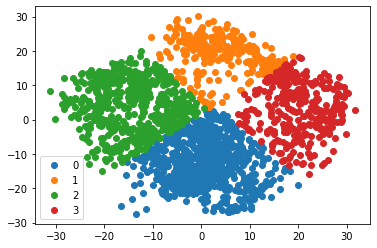

In [99]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_final[label == i , 0] , df_final[label == i , 1] , label = i)
plt.legend()
plt.show()